In [1]:
# HIDDEN
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Regression line vs other lines

In [2]:
def standard_units(arr):
    """ Converts an array to standard units """
    return (arr - np.average(arr))/np.std(arr)

def correlation(t, x, y):
    """ Computes correlation: t is a table, and x and y are column names """
    x_standard = standard_units(t.column(x))
    y_standard = standard_units(t.column(y))
    return np.average(x_standard * y_standard)

def slope(t, x, y):
    """ Computes the slope of the regression line, like correlation above """
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return r * y_sd / x_sd

def intercept(t, x, y):
    """ Computes the intercept of the regression line, like slope above """
    x_mean = np.mean(t.column(x))
    y_mean = np.mean(t.column(y))
    return y_mean - slope(t, x, y)*x_mean

def fitted_values(t, x, y):
    """Return an array of the regression estimates (predictions) at all the x values"""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*t.column(x) + b # y value (regression line)

In [3]:
def demographics_errors(slope, intercept):
    # Use four convenient points from the original data
    sample = [[14.7, 33995], [19.1, 61454], [50.7, 71183], [59.5, 105918]]
    demographics.scatter('College%', 'Median Income', alpha=0.5)
    xlims = make_array(5, 75)
    # Plot a line with the slope and intercept you specified:
    plots.plot(xlims, slope * xlims + intercept, lw=4)
    # Plot red lines from each of the four points to the line
    for x, y in sample:
        plots.plot([x, x], [y, slope * x + intercept], color='r', lw=4)

In [4]:
demographics = Table.read_table('data/district_demographics2016.csv')
demographics = demographics.drop(
    'State', 'District', 'Percent voting for Clinton')
demographics.show(5)

Median Income,College%
47083,24
42035,21.8
46544,22.8
41110,17
51690,30.3


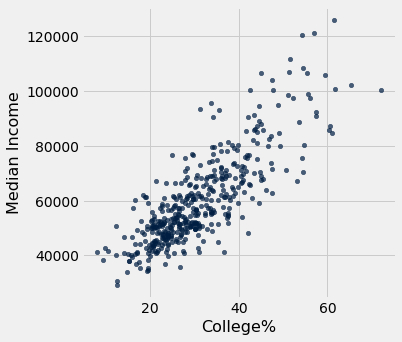

In [5]:
demographics.scatter('College%', 'Median Income')

In [6]:
correlation(demographics, 'College%', 'Median Income')

0.8184648517141335

In [7]:
regression_slope = slope(demographics, 'College%', 'Median Income')
regression_intercept = intercept(demographics, 'College%', 'Median Income')
regression_slope, regression_intercept

(1270.70168946388, 20802.577766677925)

In [8]:
predicted = fitted_values(demographics, 'College%', 'Median Income')

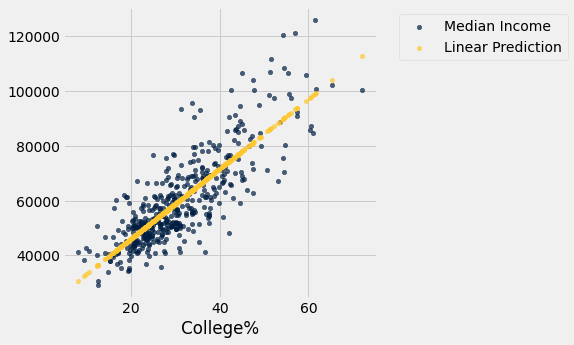

In [9]:
demographics = demographics.with_column(
    'Linear Prediction', predicted)
demographics.scatter('College%')

In [11]:
predicted

array([ 51299.41831381,  48503.87459699,  49774.57628645,  42404.50648756,
        59304.83895743,  67437.32977   ,  45454.19054228,  58415.34777481,
        51934.76915854,  64006.43520845,  41769.15564283,  45200.05020438,
        66547.83858738,  78492.43446834,  38592.40141917,  58161.20743692,
        68453.89112157,  41769.15564283,  58923.62845059,  54984.45321326,
        40879.66446021,  50918.20780697,  41896.22581178,  76205.1714273 ,
        96409.32828978,  80779.69750937,  81160.90801621,  77984.15379255,
        36305.13837814,  93232.57406612,  98950.73166871,  65912.48774265,
        72647.2066968 ,  56255.15490272,  30841.12111344,  51426.48848276,
        47233.17290753,  64006.43520845,  56128.08473377,  64133.5053774 ,
        72265.99618997,  79508.99581991,  45200.05020438,  52697.19017222,
        74680.32939995,  49647.50611751,  47995.5939212 , 103906.46825762,
        53078.40067906,  41260.87496705,  46979.03256963,  67691.4701079 ,
        50664.06746908,  

In [10]:
actual = demographics.column('Median Income')
errors = actual - predicted

In [12]:
demographics.with_column('Error', errors)

Median Income,College%,Linear Prediction,Error
47083,24,51299.4,-4216.42
42035,21.8,48503.9,-6468.87
46544,22.8,49774.6,-3230.58
41110,17,42404.5,-1294.51
51690,30.3,59304.8,-7614.84
61413,36.7,67437.3,-6024.33
34664,19.4,45454.2,-10790.2
76440,29.6,58415.3,18024.7
50537,24.5,51934.8,-1397.77
49072,34,64006.4,-14934.4


In [13]:
np.mean(errors)
# 0.000000000000635 
# ~0

6.356008950321154e-13

In [14]:
np.mean(errors ** 2) ** 0.5

9398.515588571281

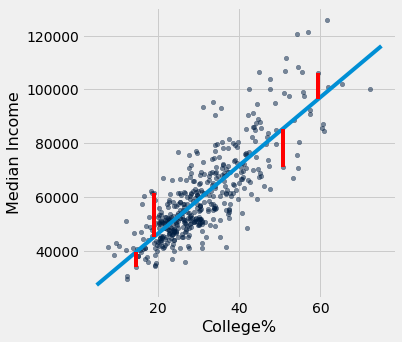

In [15]:
demographics_errors(regression_slope, regression_intercept)

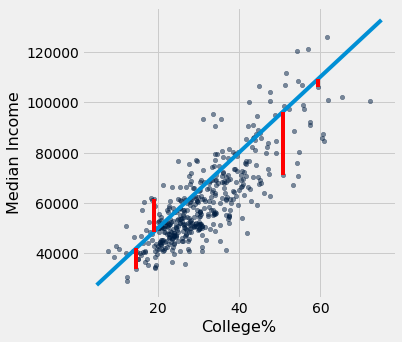

In [16]:
# takes any slope, any intercept

demographics_errors(1500, 20000)

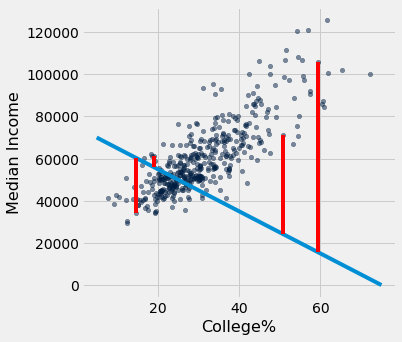

In [17]:
demographics_errors(-1000, 75000)

### Root Mean Square Error ###

In [18]:
def show_demographics_rmse(slope, intercept):
    demographics_errors(slope, intercept)
    x = demographics.column('College%')
    y = demographics.column('Median Income')
    prediction = slope * x + intercept
    mse = np.mean((y - prediction) ** 2)
    print("Root mean squared error:", round(mse ** 0.5, 2))

Root mean squared error: 30247.88


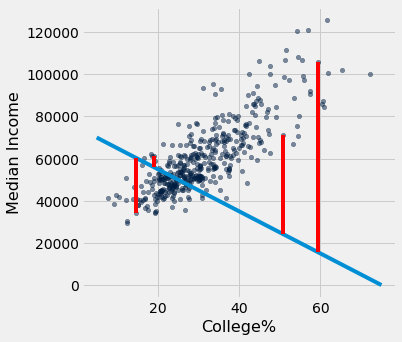

In [19]:
show_demographics_rmse(-1000, 75000)

Root mean squared error: 11559.09


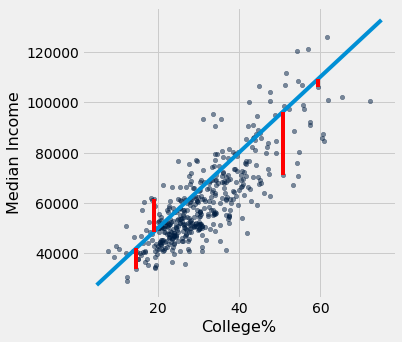

In [20]:
show_demographics_rmse(1500, 20000)

Root mean squared error: 9398.52


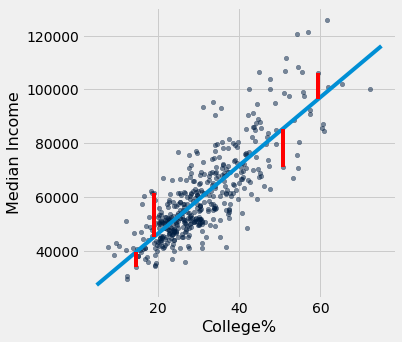

In [21]:
show_demographics_rmse(regression_slope, regression_intercept)

### Numerical Optimization ###

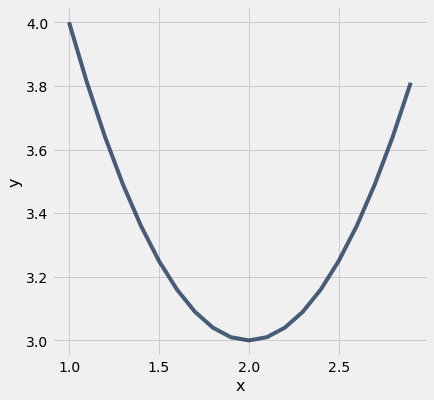

In [22]:
x = np.arange(1, 3, 0.1)
y = (x-2)**2 + 3
Table().with_columns('x', x, 'y', y).plot('x')

In [23]:
def f(x):
    return ((x-2)**2) + 3

In [24]:
minimize(f)

1.9999999946252267

In [25]:
def complicated_function(x):
    return 2 * np.sin(x*np.pi) + x ** 3 + x ** 4 

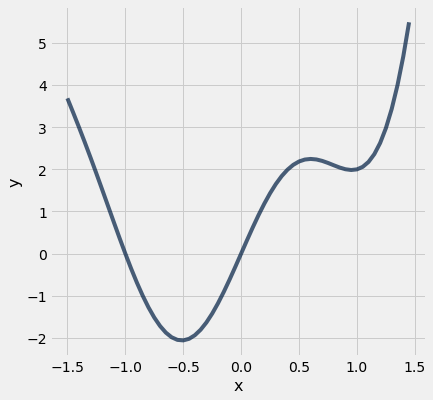

In [26]:
x = np.arange(-1.5, 1.5, 0.05)
y2 = complicated_function(x)
Table().with_columns('x', x, 'y', y2).plot('x')

In [27]:
minimize(complicated_function)

-0.5126437620940081

### Minimizing RMSE ###

In [28]:
def demographics_rmse(any_slope, any_intercept):
    x = demographics.column('College%')
    y = demographics.column('Median Income')
    estimate = any_slope*x + any_intercept
    return (np.mean((y - estimate) ** 2)) ** 0.5

In [29]:
demographics_rmse(1500, 20000)

11559.086490075999

In [30]:
demographics_rmse(-1000, 75000)

30247.883767944502

In [31]:
minimize(demographics_rmse)

array([ 1270.70168805, 20802.57933807])

In [32]:
make_array(regression_slope, regression_intercept)


array([ 1270.70168946, 20802.57776668])

### Nonlinear Regression ###

In [33]:
shotput = Table.read_table('data/shotput.csv')
shotput

Weight Lifted,Shot Put Distance
37.5,6.4
51.5,10.2
61.3,12.4
61.3,13
63.6,13.2
66.1,13
70,12.7
92.7,13.9
90.5,15.5
90.5,15.8


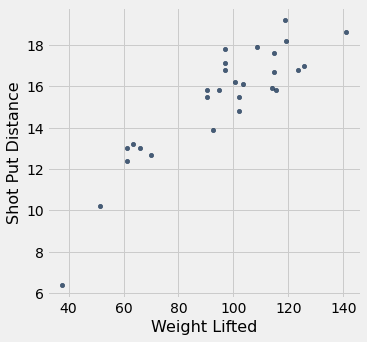

In [34]:
shotput.scatter('Weight Lifted')

In [35]:
def shotput_linear_rmse(any_slope, any_intercept):
    x = shotput.column('Weight Lifted')
    y = shotput.column('Shot Put Distance')
    estimate = any_slope*x + any_intercept
    return np.mean((y - estimate) ** 2) ** 0.5

In [36]:
best_line = minimize(shotput_linear_rmse)
best_line

array([0.09834382, 5.95962883])

In [40]:
shotput_linear_rmse(0.09834382, 5.95962883)

1.219444484505928

In [37]:
weights = shotput.column(0)

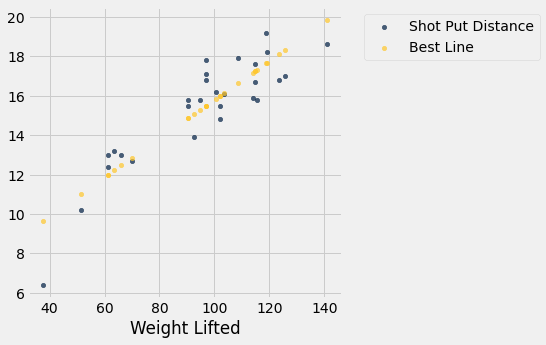

In [38]:
linear_fit = best_line.item(0)*weights + best_line.item(1)

shotput.with_column(
    'Best Line', linear_fit
).scatter(0)

In [39]:
correlation(shotput, 'Shot Put Distance', 'Weight Lifted')

0.8929919094772174

**Quadratic Function**

$$
f(x) ~=~ ax^2 + bx + c
$$
for constants $a$, $b$, and $c$.



In [41]:
def shotput_quadratic_rmse(a, b, c):
    x = shotput.column('Weight Lifted')
    y = shotput.column('Shot Put Distance')
    estimate = a*(x**2) + b*x + c
    return np.mean((y - estimate) ** 2) ** 0.5

In [42]:
best_quad = minimize(shotput_quadratic_rmse)
best_quad

array([-1.04003731e-03,  2.82706003e-01, -1.53167618e+00])

In [46]:
shotput_quadratic_rmse(-1.04003731e-03,  2.82706003e-01, -1.53167618e+00)

0.9818845230610078

In [43]:
# x = weight lifted = 100 kg
# Then predicted shot put distance:

(-0.00104)*(100**2) + 0.2827*100 - 1.5318

16.3382

In [44]:
quad_fit = best_quad.item(0)*(weights**2) + best_quad.item(1)*weights + best_quad.item(2)

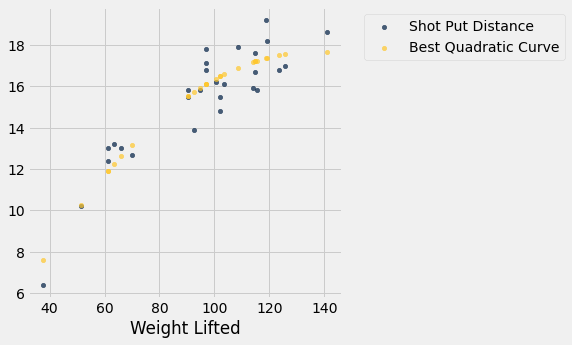

In [45]:
shotput.with_column('Best Quadratic Curve', quad_fit).scatter(0)

## Residuals

In [47]:
def residuals(t, x, y):
    predictions = fitted_values(t, x, y)
    return t.column(y) - predictions

In [48]:
demographics = demographics.with_columns(
    'Fitted Value', fitted_values(demographics, 'College%', 'Median Income'),
    'Residual', residuals(demographics, 'College%', 'Median Income')
)
demographics

Median Income,College%,Linear Prediction,Fitted Value,Residual
47083,24,51299.4,51299.4,-4216.42
42035,21.8,48503.9,48503.9,-6468.87
46544,22.8,49774.6,49774.6,-3230.58
41110,17,42404.5,42404.5,-1294.51
51690,30.3,59304.8,59304.8,-7614.84
61413,36.7,67437.3,67437.3,-6024.33
34664,19.4,45454.2,45454.2,-10790.2
76440,29.6,58415.3,58415.3,18024.7
50537,24.5,51934.8,51934.8,-1397.77
49072,34,64006.4,64006.4,-14934.4


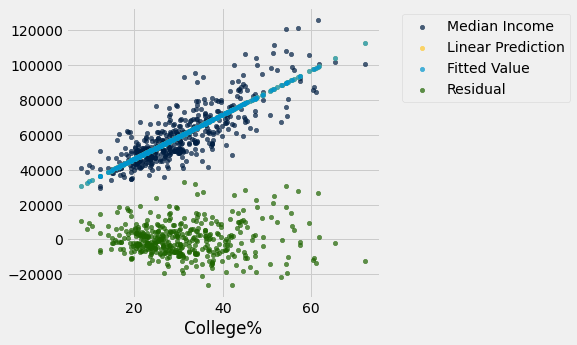

In [49]:
demographics.scatter('College%')

In [50]:
def plot_residuals(t, x, y):
    tbl = t.with_columns(
        'Fitted', fitted_values(t, x, y),
        'Residual', residuals(t, x, y)
    )
    tbl.select(x, y, 'Fitted').scatter(0)
    tbl.scatter(x, 'Residual')

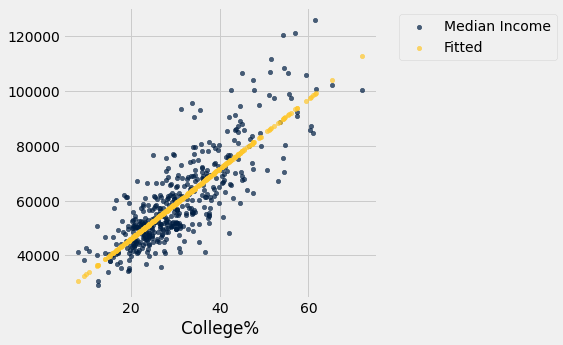

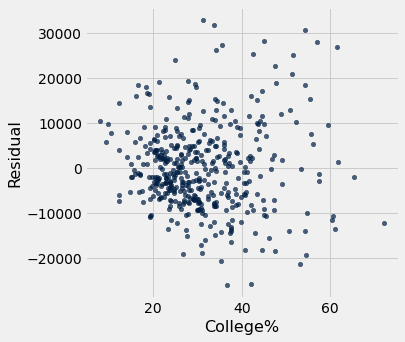

In [51]:
plot_residuals(demographics, 'College%', 'Median Income')

In [ ]:
# when we look at residuals, we are looking patterns in
# our errors

# above, there is no discernible pattern, negative/positive trend
# centered at 0

# this is what we want to see in our residual plot

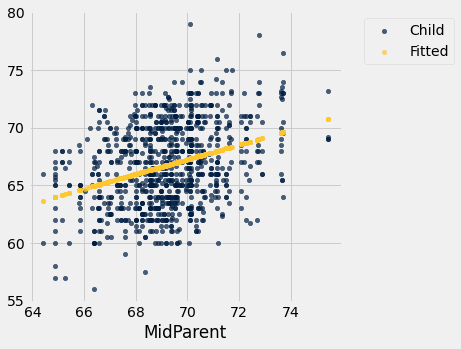

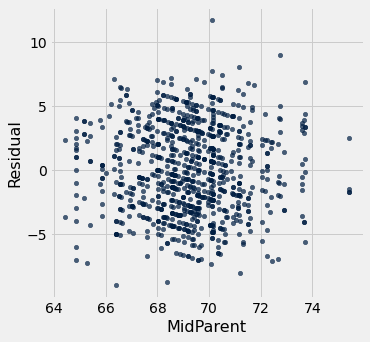

In [52]:
galton = Table.read_table('data/galton.csv')

heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight')
    )
plot_residuals(heights, 'MidParent', 'Child')

In [ ]:
# check residual plot above
# are there any discernible patterns or trends?

# what does this mean about our regression line we generated above for our galton data?
# our regression line, our predictions for child height based on midparent height
# are pretty good!


## Dugongs ##

In [53]:
dugong = Table.read_table('data/dugong.csv')
dugong.show(5)

Length,Age
1.8,1
1.85,1.5
1.87,1.5
1.77,1.5
2.02,2.5


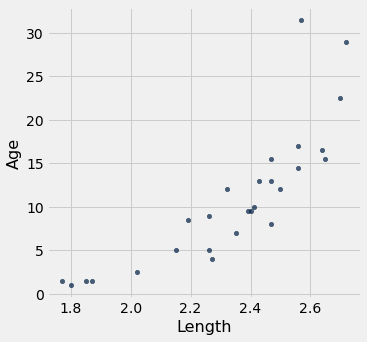

In [54]:
dugong.scatter('Length', 'Age')

In [55]:
correlation(dugong, 'Length', 'Age')

0.8296474554905714

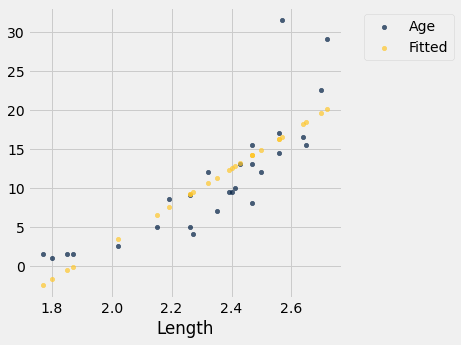

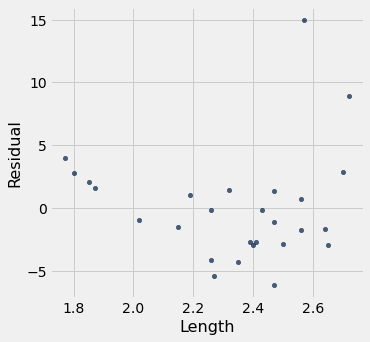

In [56]:
plot_residuals(dugong, 'Length', 'Age')

In [ ]:
# what does our residual plot look like?
# do you see any discernible pattern or trend?

# what does this residual plot say about our regression line for dugongs?



In [ ]:
# maybe a linear regression line is not the best fit 
# for our dugong data set

# would a nonlinear regression help us make better predictions?



In [ ]:
# take home CHALLENGE
# try a nonlinear regression to predict dugong ages based on length
# visual confirmation of how good your prediction(s) is
# hint: shotput example


# triple bonus: compare rmse of the linear regression and the rmse of the nonlinear 
#regression line
# quantitative measure of how good your predictions are


# US Women

In [ ]:
us_women = Table.read_table('data/us_women.csv')
us_women.show(5)

In [ ]:
correlation(us_women, 'height', 'ave weight')

In [ ]:
plot_residuals(us_women, 'height', 'ave weight')

## Average of Residuals ##

In [60]:
residuals(dugong, 'Length', 'Age')

array([ 2.777806  ,  2.08922205,  1.61378847,  3.99095637, -0.95196339,
       -5.39488314, -1.54228166, -4.15716635, -4.29661747, -6.14921895,
        1.00685118, -0.15716635, -2.98520142, -2.74748463, -2.72291821,
       -2.86236932,  1.4165329 , -0.19835179, -1.14921895, -1.78867006,
       -2.92812118,  1.35078105, -1.69040439,  0.71132994,  2.88329487,
        8.90786129, 14.97361315])

In [57]:
round(np.average(residuals(dugong, 'Length', 'Age')), 6)

0.0

In [61]:
round(np.average(residuals(heights, 'MidParent', 'Child')), 6)

0.0

In [62]:
round(np.average(residuals(demographics, 'College%', 'Median Income')), 6)

0.0

In [64]:
heights = heights.with_columns(
    'Residual', residuals(heights, 'MidParent', 'Child'),
    'Fitted Value', fitted_values(heights, 'MidParent', 'Child')
)
heights

MidParent,Child,Residual,Fitted Value
75.43,73.2,2.48763,70.7124
75.43,69.2,-1.51237,70.7124
75.43,69,-1.71237,70.7124
75.43,69,-1.71237,70.7124
73.66,73.5,3.91576,69.5842
73.66,72.5,2.91576,69.5842
73.66,65.5,-4.08424,69.5842
73.66,65.5,-4.08424,69.5842
72.06,71,2.43553,68.5645
72.06,68,-0.564467,68.5645


In [65]:
round(correlation(heights, 'MidParent', 'Residual'), 6)

-0.0

In [66]:
round(correlation(heights, 'Fitted Value', 'Residual'), 6)

-0.0

## A Measure of Clustering ##

In [67]:
def plot_fitted(t, x, y):
    tbl = t.select(x, y)
    tbl.with_columns('Fitted Value', fitted_values(t, x, y)).scatter(0)

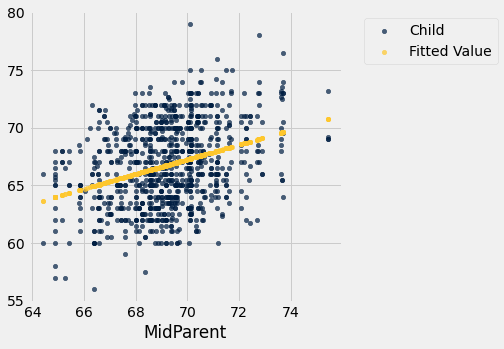

In [68]:
plot_fitted(heights, 'MidParent', 'Child')

In [69]:
child_predictions_sd = np.std(fitted_values(heights, 'MidParent', 'Child'))
child_observed_sd = np.std(heights.column('Child'))
print(child_predictions_sd)
print(child_observed_sd)

1.148145168378806
3.5773346010057634


In [70]:
child_predictions_sd / child_observed_sd

0.32094989606395957

In [71]:
correlation(heights, 'MidParent', 'Child')

0.32094989606395924

In [72]:
correlation(dugong, 'Length', 'Age')

0.8296474554905714

In [73]:
dugong_prediction_sd = np.std(fitted_values(dugong, 'Length', 'Age'))
dugong_observed_sd = np.std(dugong.column(1))
dugong_prediction_sd / dugong_observed_sd

0.8296474554905713

In [74]:
hybrid = Table.read_table('data/hybrid.csv')
hybrid.show(5)

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact
Tino,2000,35355,8.2,54.1,Compact
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact
Insight,2000,18936.4,9.52,53,Two Seater
Civic (1st Gen),2001,25833.4,7.04,47.04,Compact


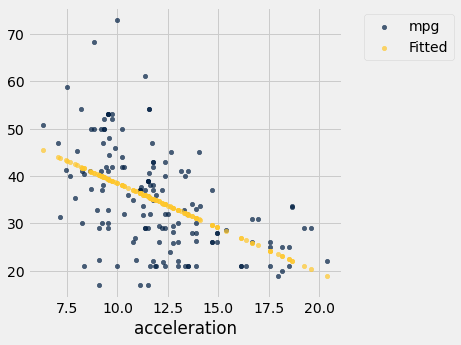

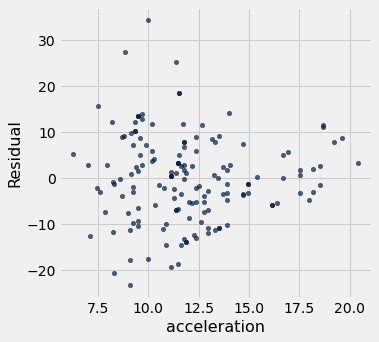

In [75]:
plot_residuals(hybrid, 'acceleration', 'mpg')

In [76]:
correlation(hybrid, 'acceleration', 'mpg')

-0.5060703843771186

In [77]:
np.std(fitted_values(hybrid, 'acceleration', 'mpg'))/np.std(hybrid.column('mpg'))

0.5060703843771186

No matter what the shape of the scatter plot, the SD of the fitted values is a fraction of the SD of the observed values of $y$. The fraction is |r|.

$$
\frac{\mbox{SD of fitted values}}{\mbox{SD of }y} ~=~ |r| ~~~~~~~~~~ \mbox{That is,} ~~ \mbox{SD of fitted values} = |r|\cdot \mbox{SD of }y
$$

## SD of the Residuals ##
No matter what the shape of the scatter plot, the SD of the residuals is a fraction of the SD of the observed values of $y$. The fraction is  $\sqrt{1-r^2}$.

$$
\mbox{SD of residuals} ~=~ \sqrt{1 - r^2} \cdot \mbox{SD of }y
$$

In [ ]:
plot_fitted(heights, 'MidParent', 'Child')

In [ ]:
plot_fitted(heights, 'MidParent', 'Child')
ave_child = np.mean(heights.column('Child'))
plots.plot([64, 76], [ave_child, ave_child]);

In [ ]:
np.std(heights.column('Child')) ** 2

In [ ]:
np.std(residuals(heights, 'MidParent', 'Child')) ** 2

In [ ]:
np.std(heights.column('Fitted Value')) ** 2

In [ ]:
np.std(dugong.column('Age')) ** 2

In [ ]:
np.std(fitted_values(dugong, 'Length', 'Age')) ** 2

In [ ]:
np.std(residuals(dugong, 'Length', 'Age')) ** 2

In [ ]:
r = correlation(heights, 'MidParent', 'Child')
r

In [ ]:
np.sqrt(1 - r**2) * np.std(heights.column('Child'))

In [ ]:
np.std(residuals(hybrid, 'acceleration', 'mpg'))

In [ ]:
r = correlation(hybrid, 'acceleration', 'mpg')
r

In [ ]:
np.sqrt(1 - r**2)*np.std(hybrid.column('mpg'))